# Problems

## Problem 1: Extending the Lady Tasting Tea

The Lady Tasting Tea experiment, designed by statistician Ronald A. Fisher, investigated Dr Muriel Bristol's claim that she could distinguish whether milk or tea was poured first into a cup. Fisher set up an experiment with eight cups of tea, four with milk first and four with tea first, arranged in random order. Bristol's task was to correctly identify which cups were which. Fisher used this setup to demonstrate how to form a null hypothesis (she is guessing) and evaluate the probability of correctly identifying all cups by chance.

Here we extend the original eight cup experiment to twelve cups of tea, four with milk first and eight with tea first. Using `numpy`, we will simulate the exteded design and compare the results with the original eight cup experiment.

References:
- https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
- https://en.wikipedia.org/wiki/Lady_tasting_tea
- https://www.youtube.com/watch?v=8ERFV7rV0vg&t=901s&pp=ygUQbGFkeSB0YXN0aW5nIHRlYQ%3D%3D

### Import Python Modules

In [202]:
# First let's import the python modules we will be using to conduct the analysis.
# https://numpy.org/doc/stable/user/index.html
import numpy as np

# https://matplotlib.org/stable/users/index
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/math.html
import math

# https://docs.python.org/3/library/itertools.html
import itertools

### Extended 12 Cup Experiment

To set up the extended 12-cup experiment, we can use ``math.comb(n, k)`` to calculate the number of ways to choose 4 cups out of 12, where order does not matter and no cup is selected more than once. There are 495 possible combinations in total. This means that if the cups are selected at random, the probability of correctly identifying all 4 milk-first cups is 1 in 495.

In [203]:
# Number of cups
cups = 12
milk_first = 4

# Function to calculate combinations and print result.
def combos(cups, milk_first):
    # https://docs.python.org/3/library/math.html#math.comb
    combinations = math.comb(cups, milk_first)
    print(f"Total combinations when choosing {milk_first} from {cups}: {combinations}")
    print(f"Probability of correctly identifying 4 milk first cups: 1/{combinations}")

# Run the function.
combos(cups, milk_first)

Total combinations when choosing 4 from 12: 495
Probability of correctly identifying 4 milk first cups: 1/495


We can further illustrate this by labeling the cups and using itertools.combinations to generate all possible combinations of four cups. The resulting list contains 495 combinations, confirming our calculation.

In [204]:
# Function to label cups and create a list of all combinations.
def labelled_combos(cups, milk_first):
    # Label the 12 cups.
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    cup_labels = np.arange(cups)

    # Generate all combinations.
    # https://docs.python.org/3/library/itertools.html#itertools.combinations
    combinations = list(itertools.combinations(cup_labels, milk_first))
    
    return cup_labels, combinations

# Run the function.
cup_labels, combinations = labelled_combos(cups, milk_first)

# Print results.
print(f"Cup labels: {cup_labels}")
print(f"Total combinations: {len(combinations)}")
print(f"First 5 Combinations: {combinations[:5]}")

Cup labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Total combinations: 495
First 5 Combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


Next, we randomly select the milk-first cups using ``numpy.random.choice`` and compare the selected four cups to the list of all possible combinations. By using Python’s ``set intersection method``, we can determine how many milk-first cups appear in each combination.

In [205]:
# Function to randomly shuffle the milk first cups and get the interection.
def matches(cups, milk_first):
    cup_labels, combinations = labelled_combos(cups, milk_first)
    # Label the milk first cups.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy-random-rand
    milk_first_labels = np.random.choice(cup_labels, milk_first, replace=False)

    total_matches = []
    cups_chosen = []
    number = []
    loop = 0
    # Loop through all combinations.
    for comb in combinations:
        # Return the common elements between sets.
        # https://docs.python.org/3/library/stdtypes.html#frozenset.intersection
        match = set(comb).intersection(set(milk_first_labels))
        # Add the count of common elements to a list.
        total_matches.append(len(match))
        # Loop through first 5 sets for printing results.
        loop += 1
        if loop < 6:
            cups_chosen.append(comb)
            number.append(len(match))
    
    return milk_first_labels, cups_chosen, number, total_matches


# Run the function.
x = matches(cups, milk_first)

# Print results.
print(f"Milk first labels: {x[0]}")
print("First 5 sets:")
index = 0
for i in x[1]:
    print(f"Cups chosen: {i}, Number of milk first cups: {x[2][index]}")
    index += 1

Milk first labels: [7 8 5 4]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 0
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 1
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 0
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 1


Now that we have the number of milk-first cups in each combination, we can use ``np.unique`` to count the outcomes and calculate the probability of correctly identifying 0, 1, 2, 3, or all 4 cups. We can also visualize these results using ``matplotlib.pyplot``.

In [206]:
# Function to get the count.
def get_count(cups, milk_first, printing=False):
    total_matches = matches(cups, milk_first)[3]
    # Get the counts.
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    count = np.array(np.unique(total_matches, return_counts=True))

    # Loop through to print the probabilities.
    prob = []
    if printing:
        index = 0
        for cup in count[0]:
            fraction = f"{(count[1][index])}/{(sum(count[1]))}"
            probability = (count[1][index])/(sum(count[1]))
            prob.append(probability)
            print(f"Probability of choosing {cup} cups correctly: {fraction} ({probability:.4f})")
            index += 1

    return count, prob

Probability of choosing 0 cups correctly: 70/495 (0.1414)
Probability of choosing 1 cups correctly: 224/495 (0.4525)
Probability of choosing 2 cups correctly: 168/495 (0.3394)
Probability of choosing 3 cups correctly: 32/495 (0.0646)
Probability of choosing 4 cups correctly: 1/495 (0.0020)


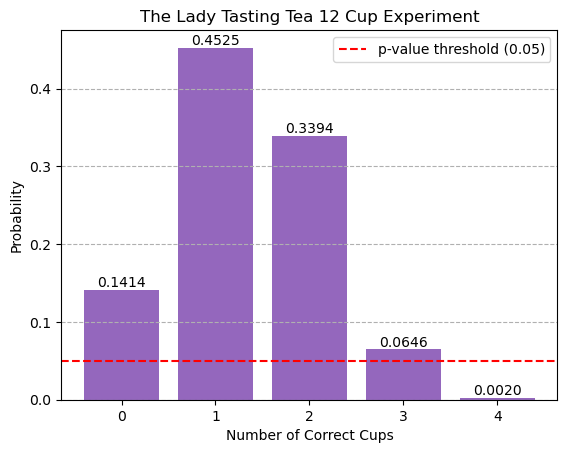

In [207]:
# Run the function to get count, probabilities.
count_12, prob_12 = get_count(cups, milk_first, printing=True)

# Plot the probabilities.
fig, ax = plt.subplots()

# Set x & y variables.
x_12 = count_12[0]
y_12 = prob_12

# Set p-value threshold.
y_pvalue = 0.05

# Set the colour.
color_12 = 'tab:purple'

# Generate the bar chart.
bar_12 = ax.bar(x_12, y_12, color=color_12)

# Add title, labels and grid.
ax.set_title(f"The Lady Tasting Tea {cups} Cup Experiment")
ax.set_xlabel("Number of Correct Cups")
ax.set_ylabel("Probability")
ax.grid(axis="y", linestyle='--')
ax.bar_label(bar_12, fmt='%.4f')

# Add line for p-value threshold.
# https://www.geeksforgeeks.org/python/plot-a-horizontal-line-in-matplotlib/
ax.axhline(y=y_pvalue, color='r', linestyle='--', label=f'p-value threshold ({y_pvalue})')

ax.legend()

# Show plot.
plt.show()

### Comparing to the Original 8 Cup Experiment

Probability of choosing 0 cups correctly: 1/70 (0.0143)
Probability of choosing 1 cups correctly: 16/70 (0.2286)
Probability of choosing 2 cups correctly: 36/70 (0.5143)
Probability of choosing 3 cups correctly: 16/70 (0.2286)
Probability of choosing 4 cups correctly: 1/70 (0.0143)


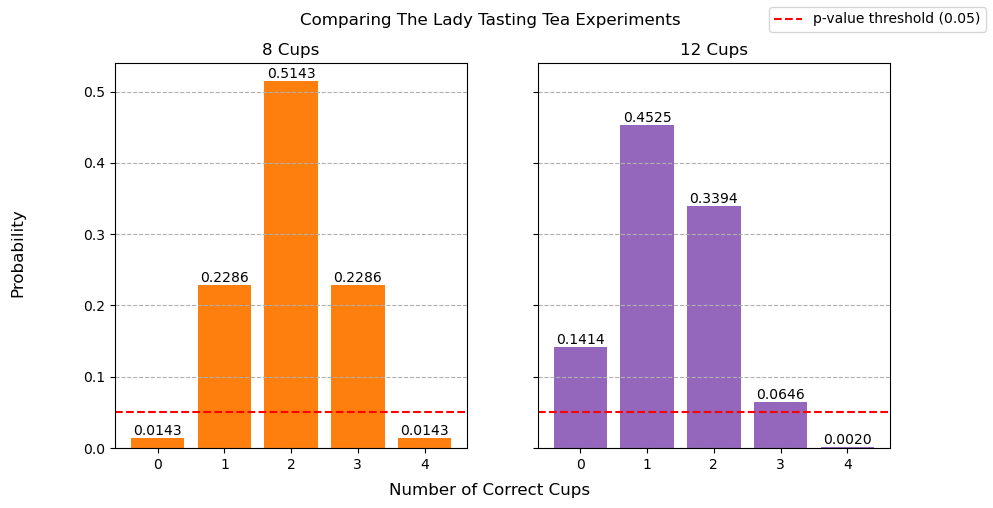

In [208]:
# Number of cups
orig_cups = 8

# Get the count.
count_8, prob_8 = get_count(orig_cups, milk_first, printing=True)

# Set x & y variables.
x_8 = count_8[0]
y_8 = prob_8

# Plot the probabilities.
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Set the colour.
color_8 = 'tab:orange'

# Generate the bar chart.
bar_comp_8 = axs[0].bar(x_8, y_8, color=color_8)
bar_comp_12 = axs[1].bar(x_12, y_12, color=color_12)

# Add title, labels and grid.
fig.suptitle(f"Comparing The Lady Tasting Tea Experiments")
fig.supxlabel("Number of Correct Cups")
fig.supylabel("Probability")
axs[0].set_title('8 Cups')
axs[1].set_title('12 Cups')
axs[0].grid(axis="y", linestyle='--')
axs[1].grid(axis="y", linestyle='--')
axs[0].bar_label(bar_comp_8, fmt='%.4f')
axs[1].bar_label(bar_comp_12, fmt='%.4f')
axs[0].axhline(y=y_pvalue, color='r', linestyle='--', label=f'p-value threshold ({y_pvalue})')
axs[1].axhline(y=y_pvalue, color='r', linestyle='--')
fig.legend()

# Show plot.
plt.show()

Looking at the results, there is about a 1.4% chance of picking all four correct cups when there are 8 cups in total, but only about a 0.2% chance when there are 12 cups. In the 8-cup experiment, getting none of the cups right is just as likely as getting all four right, and getting one right is just as likely as getting three right. This balance disappears in the 12-cup experiment, where some outcomes are more likely than others because there are more tea-first cups than milk-first cups.


|Correct Cups   |12 Cup Experiment  |8 Cup Experiment   |
|---------------|-------------------|-------------------|
|0 cups         |14.14%             |1.43%              |
|1 cups         |45.25%             |22.86%             |
|2 cups         |33.94%             |51.43%             |
|3 cups         |6.46%              |22.86%             |
|4 cups         |0.20%              |1.43%              |

In the original 8-cup experiment, Fisher used a p-value threshold of 0.05 to define statistical significance. This means that if all four cups were correctly identified, the probability of this happening by chance (about 1 in 70) would be well below the 1-in-20 threshold, leading to rejection of the null hypothesis that the selections were random.

In the 12-cup experiment, the probability of success under the null hypothesis is even smaller. As a result, there is less reason to relax the p-value threshold compared with the original design. In fact, the stronger experimental setup supports keeping the same threshold—or possibly making it more stringent—since a correct outcome is much less likely to occur by chance alone.

In [209]:
# Calculate the probabilities of choosing at least 1, 2, 3, 4 correct cups.
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
at_least_12 = 1 - np.cumsum(prob_12[:4])
at_least_8 = 1 - np.cumsum(prob_8[:4])

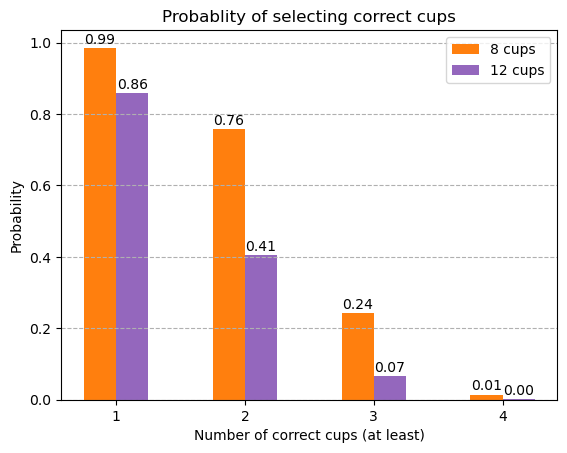

In [210]:
# Plot bar chart.
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
fig, ax = plt.subplots()

x = ("1", "2", "3", "4")
bars = np.arange(len(x))
width = 0.25

plot_8 = ax.bar(bars - 0.125, at_least_8, width=width, color='tab:orange', label='8 cups')
plot_12 = ax.bar(bars + 0.125, at_least_12, width=width, color='tab:purple', label='12 cups')

ax.set_xticks(bars, x)
ax.grid(axis='y', linestyle='--')
ax.legend()
ax.set_xlabel('Number of correct cups (at least)')
ax.set_ylabel('Probability')
ax.set_title('Probablity of selecting correct cups')
ax.bar_label(plot_8, fmt='%.2f', padding=1)
ax.bar_label(plot_12, fmt='%.2f', padding=1)

plt.show()



Plotting and comparing the probabilities of choosing at least 1, 2, or 3 correct cups further highlights how much harder the 12-cup experiment is than the 8-cup experiment. In the 8-cup case, there is about a 24% chance of correctly identifying at least three cups, while in the 12-cup case this chance drops to about 7%. This shows that as the number of cups increases, correctly identifying more cups becomes much less likely by chance alone.

|At Least   |12 Cup Experiment  |8 Cup Experiment   |
|-----------|-------------------|-------------------|
|1 cup      |85.86%             |98.57%             |
|2 cups     |40.61%             |75.71%             |
|3 cups     |6.67%              |24.29%             |

## Problem 2: Normal Distribution

Let's use `numpy.random.normal` to generate 100,000 samples of size 10 from the standard normal distribution. The standard normal distribution has a mean of 0 and standard deviation of 1.

In [211]:
# Generate samples from the standard normal distibution.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

samples = 100000
size = 10
mu = 0
sigma = 1

data = np.random.normal(loc=mu, scale=sigma, size=(samples, size))

Now let's use `numpy.std` to calculate the population standard deviation (ddof=0) and sample standard deviation (ddof=1) for each sample. We'll then plot histograms of both sets of values with `matplotlib`.

Looking at both histograms, we can see that ddof=0 is shifted slightly to the left of ddof=1. This suggests that ddof=0 is underestimating the true population standard deviation of 1. If we use `numpy.mean` to calculate the means of each set of values, we see that ddof=0 has a mean of 0.92 and ddof=1 has a mean of 0.97.

This is because [population standard deviation](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) formula divides by the number of data points N, while the sample standard deviation formula divides by one less than the number of data points in the sample, n-1.

Population standard deviation:

$\sigma = \sqrt{\dfrac{\Sigma(x_i - \bar x)^2}{N}}$

Sample standard deviation:

$s_x = \sqrt{\dfrac{\Sigma(x_i - \bar x)^2}{n-1}}$

References:
* https://ashki23.github.io/markdown-latex.html#latex

ddof=0: mean=0.9234554580251012, sd=0.22104444061256737
ddof=1: mean=0.9734075216911122, sd=0.23300129881784595


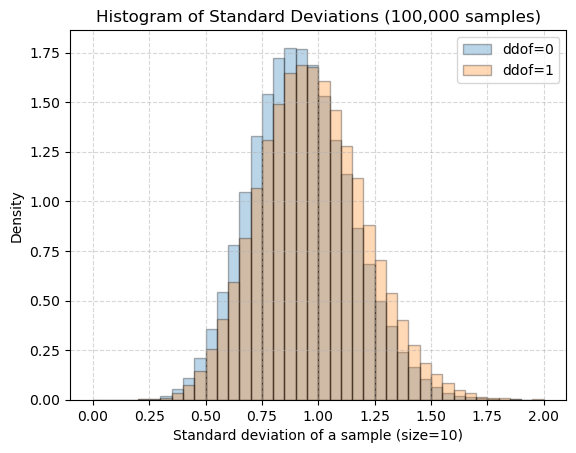

In [212]:
# Calculate the population standard deviation (ddof=0).
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

population_std = np.std(data, axis=1, ddof=0)
print(f'ddof=0: mean={np.mean(population_std)}, sd={np.std(population_std)}')

# Calculate the sample standard deviation (ddof=1).
sample_std = np.std(data, axis=1, ddof=1)
print(f'ddof=1: mean={np.mean(sample_std)}, sd={np.std(sample_std)}')

# Plot the histograms.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

fig, ax = plt.subplots()

ax.hist(population_std, color='tab:blue',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=0')
ax.hist(sample_std, color='tab:orange',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=1')

# Add labels, legend and grid.
# https://matplotlib.org/stable/api/axes_api.html#matplotlib-axes
ax.set_title(f'Histogram of Standard Deviations ({samples:,} samples)')
ax.set_xlabel(f'Standard deviation of a sample (size={size})')
ax.set_ylabel('Density')
ax.legend()
ax.grid(linestyle='--', alpha=0.5)

plt.show()

Let's increase the sample size from 10 to 100 and see how this affects the histograms.

We can see that both histograms are more tightly spread around the true population mean of 1. The means of both ddof=0 and ddof=1 are now 0.99 and the standard deviation has decreased from 0.2 to 0.07. As the sample size increases the differences between the population standard deviation and sample standard deviation converge.

ddof=0: mean=0.9923123745343386, sd=0.07070219354376947
ddof=1: mean=0.9973114609566726, sd=0.07105837813326404


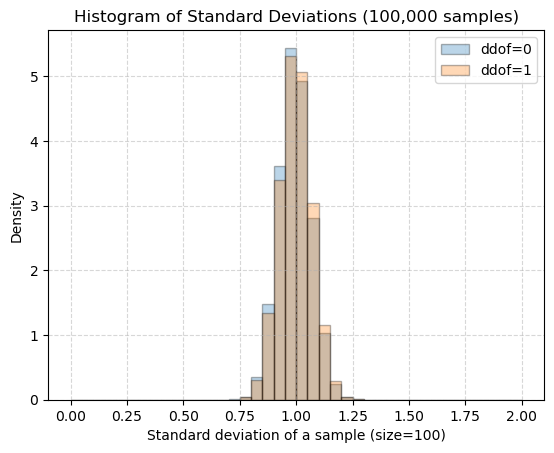

In [213]:
# Increase the sample size.
size_2 = 100
mu = 0
sigma = 1

data_2 = np.random.normal(loc=mu, scale=sigma, size=(samples, size_2))

# Calculate the population standard deviation (ddof=0).
population_std_2 = np.std(data_2, axis=1, ddof=0)
print(f'ddof=0: mean={np.mean(population_std_2)}, sd={np.std(population_std_2)}')

# Calculate the sample standard deviation (ddof=1).
sample_std_2 = np.std(data_2, axis=1, ddof=1)
print(f'ddof=1: mean={np.mean(sample_std_2)}, sd={np.std(sample_std_2)}')

# Plot the histograms.
fig, ax = plt.subplots()

ax.hist(population_std_2, color='tab:blue',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=0')
ax.hist(sample_std_2, color='tab:orange',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=1')

ax.set_title(f'Histogram of Standard Deviations ({samples:,} samples)')
ax.set_xlabel(f'Standard deviation of a sample (size={size_2})')
ax.set_ylabel('Density')
ax.legend()
ax.grid(linestyle='--', alpha=0.5)

plt.show()

## Problem 3: t-Tests

References:
* https://www.youtube.com/watch?v=CIbJSX-biu0
* 

In [214]:
# Generate samples.
size = 100 # sample size
sigma = 1 # standard deviation
mu = 0 # mean
d = np.arange(0.0, 1.1, 0.1) # mean difference
n = 1000 # number of simulations

sample_a = np.array(np.random.normal(loc=mu, scale=sigma, size=(n, size)))
sample_b = np.array([np.random.normal(loc=mean, scale=sigma, size=(n, size)) for mean in d])

# Check the shape of the arrays.
sample_a.shape, sample_b.shape

((1000, 100), (11, 1000, 100))

In [215]:
# Convert sample_a to 3D array.
# https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-convert-a-1d-array-into-a-2d-array-how-to-add-a-new-axis-to-an-array
sample_a_3d = sample_a[np.newaxis, :, :]
sample_a_3d.shape

(1, 1000, 100)

In [216]:
# Import scipy stats.
import scipy.stats as stats

# Run t-Tests.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
_, p_value = np.array(stats.ttest_ind(sample_a_3d, sample_b, axis=2))
p_value.shape

(11, 1000)

In [217]:
# Calculate proportion of times the null hyptheses is not rejected.
not_rejected = p_value >= 0.05

# https://numpy.org/doc/stable/reference/generated/numpy.sum.html
sum_not_rejected = np.sum(not_rejected, axis=1)

prop_not_rejected = sum_not_rejected / n

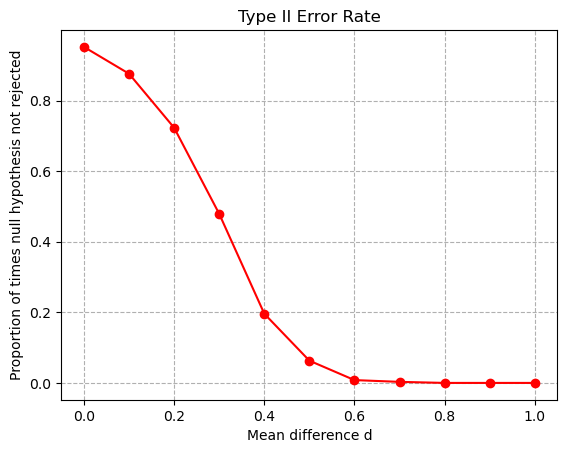

In [218]:
# Plot type II error rate.
fig, ax = plt.subplots()

x = d
y = prop_not_rejected

ax.plot(x, y, 'o-', color='red')

ax.grid(linestyle='--')
ax.set_title('Type II Error Rate')
ax.set_xlabel('Mean difference d')
ax.set_ylabel('Proportion of times null hypothesis not rejected')

plt.show()

## Problem 4: ANOVA

References:
* https://www.youtube.com/watch?v=EWYzeZbchR0&t=238s

In [219]:
# Generate samples.
sigma = 1
size = 30

sample_one = np.random.normal(loc=0.0, scale=sigma, size=size)
sample_two = np.random.normal(loc=0.5, scale=sigma, size=size)
sample_three = np.random.normal(loc=1.0, scale=sigma, size=size)

In [220]:
# Perform ANOVA test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

stats.f_oneway(sample_one, sample_two, sample_three)

F_onewayResult(statistic=11.265634845372528, pvalue=4.45840153348119e-05)

In [221]:
# Perform Tukey's HSD test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#scipy.stats.tukey_hsd

tukey = stats.tukey_hsd(sample_one, sample_two, sample_three)
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.001     0.002    -1.688    -0.313
 (0 - 2)     -1.310     0.000    -1.998    -0.622
 (1 - 0)      1.001     0.002     0.313     1.688
 (1 - 2)     -0.310     0.533    -0.997     0.378
 (2 - 0)      1.310     0.000     0.622     1.998
 (2 - 1)      0.310     0.533    -0.378     0.997



In [222]:
# Perform individual t_Tests.
_, p_value0 = stats.ttest_ind(sample_one, sample_two)
_, p_value1 = stats.ttest_ind(sample_one, sample_three)
_, p_value2 = stats.ttest_ind(sample_two, sample_three)

print(f'Comparison  p-value')
print(f'(0 - 1)     {p_value0}')
print(f'(0 - 2)     {p_value1}')
print(f'(1 - 2)     {p_value2}')

Comparison  p-value
(0 - 1)     0.0012426553244162392
(0 - 2)     1.619869938466226e-05
(1 - 2)     0.2937238220889552


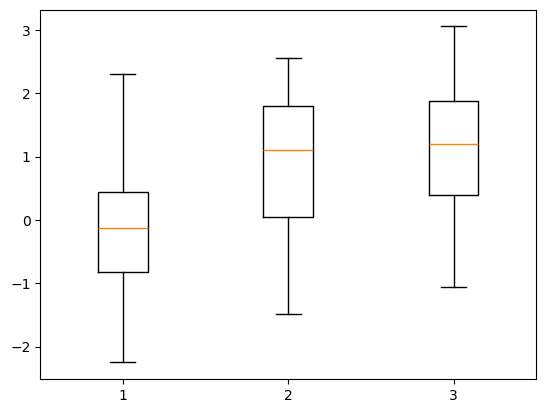

In [223]:
# Box plot.
fig, ax = plt.subplots()
ax.boxplot([sample_one, sample_two, sample_three])
plt.show()

## End